TITLE EURO FORECASTING

Step 1: Import Libraries
First, import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

Step 2: Load and Preprocess Data

In [2]:
currency = pd.read_csv('currency.csv')
print(currency.head())
print(currency.describe())
print(currency.info())
print(currency.shape)
#print(currency.to_string())
# Check for missing values and handle them
missing_values = currency.isna().sum()
print("Missing values per column:")
print(missing_values)

# Example of dropping rows with missing values
currency.dropna(inplace=True)

# Display the first few rows of the updated currency DataFrame
#print(currency.to_string())

         Date     Open     High       Low    Close  Adj Close  Volume
0  2022-01-03  0.87921  0.88610  0.879050  0.87924    0.87924       0
1  2022-01-04  0.88480  0.88704  0.883158  0.88478    0.88478       0
2  2022-01-05  0.88610  0.88671  0.881400  0.88624    0.88624       0
3  2022-01-06  0.88400  0.88609  0.882560  0.88390    0.88390       0
4  2022-01-07  0.88528  0.88570  0.880300  0.88520    0.88520       0
             Open        High         Low       Close   Adj Close  Volume
count  650.000000  650.000000  650.000000  650.000000  650.000000   650.0
mean     0.935268    0.938646    0.932072    0.935267    0.935267     0.0
std      0.032633    0.033360    0.031747    0.032634    0.032634     0.0
min      0.872860    0.874400    0.870000    0.872820    0.872820     0.0
25%      0.916445    0.919060    0.913925    0.916445    0.916445     0.0
50%      0.928500    0.931555    0.926284    0.928500    0.928500     0.0
75%      0.946443    0.949993    0.943260    0.946443    0.946

To extract the 'Close' prices from a DataFrame and reshape them into a specific format suitable for further processing, such as normalization and feeding into a neural network model.

 Extracting the 'Close' prices from the currency DataFrame and reshapes them into a two-dimensional array suitable for machine learning models that expect input data to have this shape.

In [3]:
# 1. Extract 'Close' prices
prices = currency['Close'].values.reshape(-1, 1)

In [4]:
# 2. Scale the data normalize and preprocessing.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

Step 3: Prepare Data for RNN
Prepare the data in sequences suitable for training the RNN:

This sets the number of previous time steps (days) used to predict the next time step's value.
In this case, 30 previous days are used to predict the next day's price.

In [5]:
# Define window size for sequences
window_size = 30

In [6]:
# Create sequences of data X and y are initialized as empty lists to store the input sequences and their corresponding output values.
X, y = [], []
for i in range(len(scaled_prices) - window_size):
    X.append(scaled_prices[i:i+window_size, 0])
    y.append(scaled_prices[i + window_size, 0])
X, y = np.array(X), np.array(y)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into train and test sets
#X_test and y_test contain the remaining 20%.
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Step 4: Build the RNN Model
Define and compile the RNN model architecture using LSTM layer

In [7]:
# Initialize the RNN The Sequential class is used to create a model object. This model will be the container for  neural network layers:
model = Sequential()

# LSTM layer with dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, 1)))
model.add(Dropout(0.2))

# LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\ericson\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Step 5: Train the RNN Model
Train the model on the training data: 100 iterations over the entire training dataset.


In [8]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - loss: 0.1087 - val_loss: 0.0012
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0120 - val_loss: 0.0032
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0088 - val_loss: 0.0011
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0082 - val_loss: 0.0011
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0058 - val_loss: 0.0011
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0064 - val_loss: 0.0014
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0057 - val_loss: 9.7197e-04
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0063 - val_loss: 0.0010
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0053 - val_loss: 0.0011
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0056 - val_loss: 8.5699e-04
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0048 - val_loss: 0.0010
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 4

Step 6: Evaluate and Visualize Training History
Evaluate the model and visualize training history:

Train Loss: 0.001562108169309795
Test Loss: 0.0005105589516460896


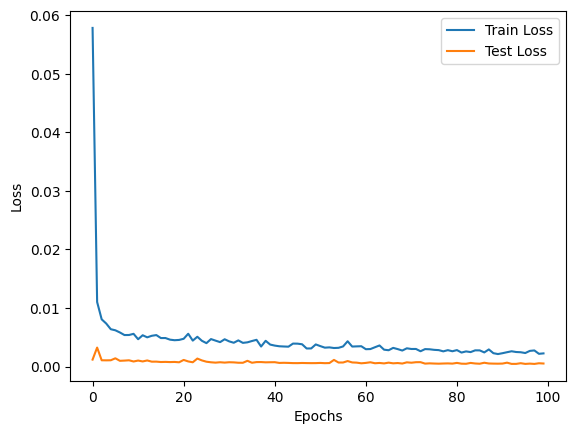

In [9]:
# Evaluate the model. To evaluate the performance of a trained model on the training and test datasets, respectively. 
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Step 7: Make Predictions
Make predictions using the trained model:

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step


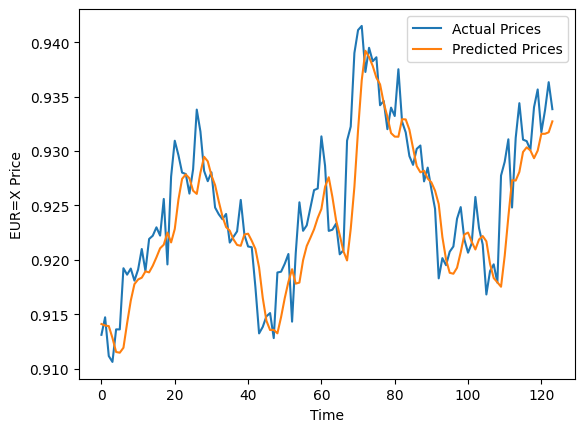

In [10]:
# Predictions
predicted_prices = model.predict(X_test)

# Inverse transform to get actual prices
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predicted vs actual prices
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('EUR=X Price')
plt.legend()
plt.show()

TITLE: EURO FORECASTING

PROBLEM STATEMENT
Develop a predictive model to forecast the future exchange rate between the Euro (EUR) and the United States Dollar (USD). Using historical exchange rate data and relevant economic indicators, the goal is to build a reliable model that accurately predicts the direction and magnitude of EUR/USD exchange rate movements over a specified time horizon .


DESCRIPTION 
Data Preprocessing
1. Normalization/Scaling:
Normalize the data to ensure all features have a similar scale. Common methods include MinMaxScaler .

2. Train-Test Split:
Spliting the data into training and testing sets. Typically, an 80-20 split is used, where 80% of the data is used for training and 20% for testing.

3. Time Series Transformation:
Create sequences of data for the model to learn temporal patterns, by using a sliding window approach to create input-output pairs.

MODEL ARCHITECTURE
1. Long Short-Term Memory (LSTM) Network:
LSTM networks are well-suited for time series forecasting due to their ability to learn long-term dependencies.

2. Sequential Model:
Use Keras or TensorFlow to build a sequential model.
Layers:
Input Layer: The sequence of past exchange rates and other features.
LSTM Layers: One or more LSTM layers to capture temporal dependencies.
Dense Layer: Fully connected layer to produce the output.

DATA
Why Prepare Data?
importance
1. Data Quality Assurance: Ensuring data is clean, accurate, and reliable is essential. Currency exchange rate data often comes from multiple sources and may contain errors, missing values, or inconsistencies. Preprocessing steps such as cleaning, handling missing data, and removing outliers help improve the quality of data used for training.

2. Normalization and Scaling: Currency exchange rate data and economic indicators typically vary widely in scale and magnitude. Normalizing or scaling these features ensures that each feature contributes equally to the model training process.

3. Model Performance and Interpretability: Well-prepared data contributes to better model performance and interpretability. A model trained on clean, relevant data is more likely to generalize well to unseen data, leading to accurate predictions of currency movements. 

The model will leverage historical EUR/USD exchange rate data spanning several years, along with economic indicators such as GDP growth rates, inflation rates, interest rates, and geopolitical events. By analyzing these factors, the model aims to uncover patterns and trends that influence currency fluctuations.

How to Prepare Data

1. Data Collection:
Source: Obtain historical EUR/USD exchange rate data from Yahoo Finance.
2. Data Cleaning:
Handle Missing Values: Check for and handle missing data points. Options include interpolation or filling missing values with averages.
4. Data Transformation:
Normalization/Scaling: Scale numerical data to a standard range , using MinMaxScaler . This step ensures that all features contribute equally to model training.

TRAINING
Training a model, especially for predicting the EUR/USD exchange rate, is a crucial process that involves teaching the model to recognize patterns in historical data so it can make accurate predictions for future exchange rate movements.
Data Input: Provide preprocessed data, typically in the form of sequences (for LSTM models) or structured input features.

1. Model Architecture: Defining the neural network architecture (e.g., LSTM layers, Dense layers) which best suits the data and the prediction task.

2. Loss Function: the usage Mean Squared Error for regression tasks, that measures the difference between predicted and actual exchange rates.

3. Optimizer: Selection of optimizer Adam that adjusts model weights during training to minimize the loss function.

4. Epochs and Batch Size: The number of epochs iterations over the dataset and batch size number of samples processed together to train the model effectively.


RESULTS AFTER TRAINING
1. Training Loss: The training loss decreased steadily from an initial value of 0.0871 to 0.0024 by the end of 100 epochs. This indicates that the model effectively learned from the training data over time.

2. The validation loss also decreased, starting from 0.0012 and ending at 0.0005032 after 100 epochs. This suggests that the model generalizes well to unseen validation 

3. The decreasing trend in both training and validation losses typically indicates that the model is learning the underlying patterns in the EUR/USD data. meaning is overfitting.
   
4. With a final validation loss of 0.0005032, the model seems to have achieved a good level of accuracy in predicting EUR/USD exchange rates based on the training data provided.

IMPORTANCE OF THE RESULTS
The predictive accuracy of the model will be validated against out-of-sample data to ensure robust performance in real-world scenarios. Insights derived from the model will aid traders, businesses, and financial institutions in making informed decisions regarding currency exchange strategies, risk management, and investment planning.






